# Оценка качества обучения нейронной сети

На примере распознаванию рукописных цифр из **набора данных MNIST**.

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [5]:
from tensorflow.keras.datasets import mnist
# mnist - библиотека для рукописных цифр
from tensorflow.keras.models import Sequential
# Вид связи - прямое распространение (нет хитрых архитектур)
from tensorflow.keras.layers import Dense, Dropout
# dence - библиотека где каждый нейрон одного слоя соединен с предыдущим
# dropout - замена необученным нейроном обученного
from tensorflow.keras import utils
# преобразование цифры в вектор {0;1}
from tensorflow.keras.preprocessing import image
from google.colab import files
# работа с файлами и картинками
import numpy as np
# работа с массивами
import matplotlib.pyplot as plt
# библиотека для визуализации данных
from PIL import Image
# работа с пикселями
%matplotlib inline
from tensorflow.keras.optimizers import Adam, RMSprop
# алгоритм управления градиентами спуска

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [6]:
# В Keras встроены средства работы с популярными наборами данных
# x_train_org - изображения из набора данных для обучения
# y_train_org - правильные ответы (метки) к набору данных для обучения
# x_test_org - изображения из набора данных для тестирования
# y_test_org - правильные ответы (метки) к набору данных для тестирования
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


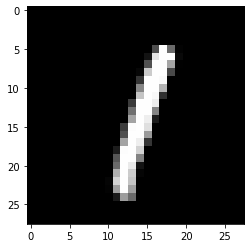

In [7]:
n = 5
# Достаем элемент n индекса для проверки обучающей выборки
plt.imshow(Image.fromarray(x_test_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [8]:
# Нейронные сети (кроме сверточных) не работают с 2d картинками, поэтому 28*28 превращаем в 784
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [9]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train.astype('float32')
x_train = x_train / 255 
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с правильными ответами**

In [10]:
print(y_test_org[n])

1


**Преобразуем метки в формат one hot encoding**

In [11]:
# превращение вектора из 0 и 1 в вектор с 10 классами 
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [12]:
print(y_test[n])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [13]:
# модель прямого распространения
model = Sequential()

**Добавляем уровни сети**

Архитектуру сети взяли по ссылке - https://en.wikipedia.org/wiki/MNIST_database


In [14]:
# Dence - вид связи нейронов между слоями
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
# relu - полулинейная функция = max(0, x) = ln(1+e^x)
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
# активационная функция softmax сделает так что на выходе сумма будет равна 1 
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# выводит информацию о модуле 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [17]:
# batch_size - объем данных, который будут обрабатывать нейроны за 1 эпоху.
# epochs - количество повторов обучения
# verbose=1 - выводит данные

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    verbose=1)


Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0062 - accuracy: 0.9989
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0046 - accuracy: 0.9992
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0076 - accuracy: 0.9980
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0045 - accuracy: 0.9990
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0042 - accuracy: 0.9990
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9998
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0036 - accuracy: 0.9990

## Проверяем качество обучения на тестовом наборе данных

In [19]:
# функция evaluate проверяет точность распознования на проверочной выборке
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 7.9020 - accuracy: 0.5872


In [20]:
scores

[7.902012348175049, 0.5871999859809875]

In [21]:
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

Доля верных ответов на тестовых данных, в процентах: 58.72%


#Проверочная выборка

In [22]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(100, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# validation_split - берет процент данных из обучающей выборки и добавляет ее в проверочную
# функция fit - способ указать проверучную выборку
history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
240/240 [==============================] - 2s 5ms/step - loss: 0.4898 - accuracy: 0.8671 - val_loss: 0.2556 - val_accuracy: 0.9277
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 0.2318 - accuracy: 0.9346 - val_loss: 0.1908 - val_accuracy: 0.9479
Epoch 3/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1771 - accuracy: 0.9497 - val_loss: 0.1577 - val_accuracy: 0.9556
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1422 - accuracy: 0.9592 - val_loss: 0.1410 - val_accuracy: 0.9607
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1192 - accuracy: 0.9661 - val_loss: 0.1272 - val_accuracy: 0.9653
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1007 - accuracy: 0.9711 - val_loss: 0.1185 - val_accuracy: 0.9677
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0869 - accuracy: 0.9758 - val_loss: 0.1117 - val_accuracy: 0.9680
Epoch 

In [23]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 40000

# validation_data=(x_train[nVal:], y_train[nVal:]) - на данном x или y делаем validation
history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

Epoch 1/10
200/200 [==============================] - 2s 7ms/step - loss: 0.3339 - accuracy: 0.9050 - val_loss: 0.1845 - val_accuracy: 0.9485
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.1360 - accuracy: 0.9603 - val_loss: 0.1291 - val_accuracy: 0.9625
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0882 - accuracy: 0.9746 - val_loss: 0.1094 - val_accuracy: 0.9669
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0624 - accuracy: 0.9820 - val_loss: 0.1002 - val_accuracy: 0.9702
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0443 - accuracy: 0.9875 - val_loss: 0.0956 - val_accuracy: 0.9718
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0323 - accuracy: 0.9922 - val_loss: 0.0910 - val_accuracy: 0.9729
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0254 - accuracy: 0.9940 - val_loss: 0.0949 - val_accuracy: 0.9706
Epoch 

## Визуализация качества обучения


Состав словаря History

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Печатаем значения ошибки на обучающем наборе данных

In [25]:
history.history['loss']

[0.33386173844337463,
 0.13603459298610687,
 0.08816608041524887,
 0.062443286180496216,
 0.04425787180662155,
 0.032279111444950104,
 0.025378422811627388,
 0.018409468233585358,
 0.012963734567165375,
 0.009093585424125195]

Печатаем долю неверных ответов на проверочном наборе данных

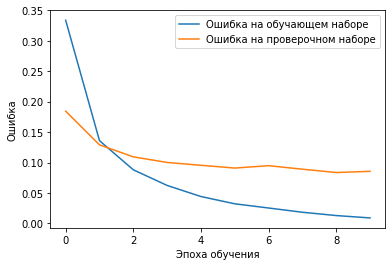

In [26]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

#Переобучение
**Без Dropout**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.4205 - accuracy: 0.0400 - val_loss: 34.6642 - val_accuracy: 0.4016
Epoch 2/10
1/1 [==============================] - 1s 911ms/step - loss: 18.3483 - accuracy: 0.5400 - val_loss: 88.2606 - val_accuracy: 0.1814
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 81.4347 - accuracy: 0.2400 - val_loss: 59.5205 - val_accuracy: 0.1864
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 52.6037 - accuracy: 0.2300 - val_loss: 22.1898 - val_accuracy: 0.3380
Epoch 5/10
1/1 [==============================] - 1s 912ms/step - loss: 13.7914 - accuracy: 0.5100 - val_loss: 12.8344 - val_accuracy: 0.4148
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 7.8796 - accuracy: 0.6000 - val_loss: 10.0746 - val_accuracy: 0.5080
Epoch 7/10
1/1 [==============================] - 1s 926ms/step - loss: 4.5359 - accuracy: 0.6800 - val_loss: 7.6802 - val_accuracy: 0.5808
Epoch 8/10
1/1 [======

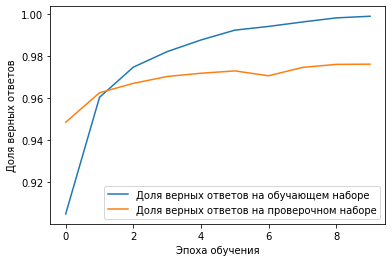

In [27]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

def show_history(model, x_train, y_train):
  history = model.fit(x_train[:nVal], 
                      y_train[:nVal], 
                      batch_size=200, 
                      epochs=10,
                      validation_data=(x_train[nVal:], y_train[nVal:]),
                      verbose=1)
show_history(model, x_train, y_train)
def printing(history):
  plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()
printing(history)

**Dropout 30%**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 2.3081 - accuracy: 0.0800 - val_loss: 59.5153 - val_accuracy: 0.1150
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 42.7138 - accuracy: 0.1800 - val_loss: 56.8974 - val_accuracy: 0.2864
Epoch 3/10
1/1 [==============================] - 1s 914ms/step - loss: 58.0866 - accuracy: 0.4300 - val_loss: 57.8904 - val_accuracy: 0.2945
Epoch 4/10
1/1 [==============================] - 1s 898ms/step - loss: 63.9279 - accuracy: 0.3800 - val_loss: 32.2666 - val_accuracy: 0.3693
Epoch 5/10
1/1 [==============================] - 1s 906ms/step - loss: 36.1535 - accuracy: 0.5000 - val_loss: 20.0298 - val_accuracy: 0.3875
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 15.9496 - accuracy: 0.4900 - val_loss: 9.8090 - val_accuracy: 0.4961
Epoch 7/10
1/1 [==============================] - 1s 916ms/step - loss: 2.3381 - accuracy: 0.7500 - val_loss: 11.8774 - val_accuracy: 0.4797
Epoch 8/10
1/1 [==

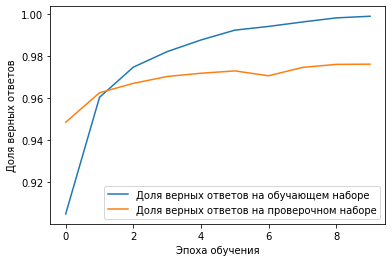

In [28]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.3))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

show_history(model, x_train, y_train)
printing(history)

**Dropout 80%**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 2.8488 - accuracy: 0.0300 - val_loss: 23.8788 - val_accuracy: 0.2865
Epoch 2/10
1/1 [==============================] - 1s 900ms/step - loss: 24.2043 - accuracy: 0.3400 - val_loss: 19.6062 - val_accuracy: 0.3519
Epoch 3/10
1/1 [==============================] - 1s 897ms/step - loss: 31.6061 - accuracy: 0.3300 - val_loss: 10.7746 - val_accuracy: 0.4752
Epoch 4/10
1/1 [==============================] - 1s 913ms/step - loss: 19.1624 - accuracy: 0.4300 - val_loss: 10.8268 - val_accuracy: 0.4847
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 15.4029 - accuracy: 0.4400 - val_loss: 11.5367 - val_accuracy: 0.5242
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 10.7977 - accuracy: 0.5800 - val_loss: 8.3019 - val_accuracy: 0.5984
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 7.3725 - accuracy: 0.6300 - val_loss: 6.2080 - val_accuracy: 0.6477
Epoch 8/10
1/1 [======

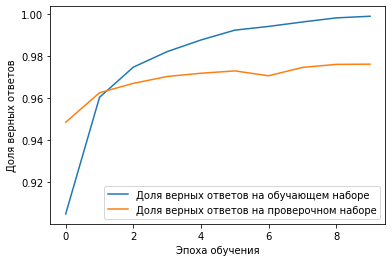

In [29]:
from tensorflow.python.keras.metrics import accuracy
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.8))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

show_history(model, x_train, y_train)
printing(history)

**Dropout 10%**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.3711 - accuracy: 0.0600 - val_loss: 58.2578 - val_accuracy: 0.2088
Epoch 2/10
1/1 [==============================] - 1s 935ms/step - loss: 40.5981 - accuracy: 0.2600 - val_loss: 47.9536 - val_accuracy: 0.3319
Epoch 3/10
1/1 [==============================] - 1s 940ms/step - loss: 47.8590 - accuracy: 0.4400 - val_loss: 66.4406 - val_accuracy: 0.2166
Epoch 4/10
1/1 [==============================] - 1s 935ms/step - loss: 63.6150 - accuracy: 0.2800 - val_loss: 33.0555 - val_accuracy: 0.3263
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 30.6282 - accuracy: 0.4500 - val_loss: 15.6223 - val_accuracy: 0.3479
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 9.4297 - accuracy: 0.5400 - val_loss: 8.4050 - val_accuracy: 0.4831
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 2.2316 - accuracy: 0.7600 - val_loss: 8.2509 - val_accuracy: 0.5221
Epoch 8/10
1/1 [=======

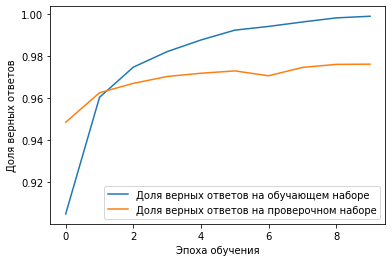

In [31]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.1))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

show_history(model, x_train, y_train)
printing(history)

#Активационные функции

Epoch 1/10
240/240 [==============================] - 2s 5ms/step - loss: 0.8299 - accuracy: 0.8195 - val_loss: 0.4007 - val_accuracy: 0.9003
Epoch 2/10
240/240 [==============================] - 1s 6ms/step - loss: 0.3573 - accuracy: 0.9054 - val_loss: 0.2922 - val_accuracy: 0.9212
Epoch 3/10
240/240 [==============================] - 2s 7ms/step - loss: 0.2838 - accuracy: 0.9212 - val_loss: 0.2508 - val_accuracy: 0.9308
Epoch 4/10
240/240 [==============================] - 2s 7ms/step - loss: 0.2442 - accuracy: 0.9305 - val_loss: 0.2241 - val_accuracy: 0.9372
Epoch 5/10
240/240 [==============================] - 1s 6ms/step - loss: 0.2154 - accuracy: 0.9391 - val_loss: 0.2065 - val_accuracy: 0.9428
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1934 - accuracy: 0.9450 - val_loss: 0.1867 - val_accuracy: 0.9488
Epoch 7/10
240/240 [==============================] - 1s 5ms/step - loss: 0.1746 - accuracy: 0.9501 - val_loss: 0.1762 - val_accuracy: 0.9496
Epoch 

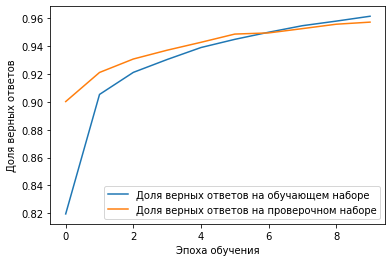

In [38]:
model = Sequential()

# Входной полносвязный слой, 100 нейронов, 784 входа в каждый нейрон
# Сигмоида позволяет усиливать слабые сигналы и уменьшает
model.add(Dense(100, input_dim=784, activation="sigmoid"))
#model.add(Dropout(0.2))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

printing(history)

# Материал изучения активационных функций
https://neurohive.io/ru/osnovy-data-science/activation-functions/
https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8

#Усреднение точности сети по нескольким итерациям

In [33]:
valAcc = []
iterations = 10

for i in range(1, iterations+1):
  model = Sequential()

  # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
  model.add(Dense(10, input_dim=784, activation="relu"))
  #model.add(Dropout(0.2))
  # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
  model.add(Dense(10, activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=200, 
                      epochs=5,
                      validation_split=0.2,
                      verbose=0)
  
  # Массив точности работы нейронных сетей
  currAcc = history.history['val_accuracy'][-1]
  valAcc.append(currAcc)
  print("Запуск", i, "точность", currAcc)
  

Запуск 1 точность 0.9210833311080933
Запуск 2 точность 0.918666660785675
Запуск 3 точность 0.921833336353302
Запуск 4 точность 0.9243333339691162
Запуск 5 точность 0.9096666574478149
Запуск 6 точность 0.921916663646698
Запуск 7 точность 0.9166666865348816
Запуск 8 точность 0.9171666502952576
Запуск 9 точность 0.9225000143051147
Запуск 10 точность 0.9245833158493042


In [34]:
# Превращение из листа в numpy array для обработки данных
valAcc = np.array(valAcc)
# Среднее и амплитуда разброса точности
meanAcc = sum(valAcc) / valAcc.shape[0]
print(meanAcc)
print(max(valAcc) - min(valAcc))

0.9198416650295258
0.014916658401489258


#Запуск нескольких сетей

In [35]:
def evaluateModel(model, batchSize, epohs, valSplit):
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=batchSize, 
                      epochs=epohs,
                      validation_split=valSplit,
                      verbose=0)
  
  currAcc = history.history['val_accuracy'][-1]
  
  return currAcc, history

In [36]:
models = []

model = Sequential()
model.add(Dense(10, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(20, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(30, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

# Массив с объемом данных, который будут обрабатывать нейроны за 1 эпоху для разных нейронок
batchSisez = [100, 200, 300]

acc = []
hist = []
for i in range(len(models)):
  acc.append(evaluateModel(models[i], batchSisez[i], 5, 0.2))
    
print(acc)


[0.9242500066757202, 0.9338333606719971, 0.9392499923706055]
